In [138]:
import numpy as np
import pandas as pd
import seaborn as sns
from keras.datasets import fashion_mnist
from sklearn.model_selection import train_test_split
from keras.models import Sequential
from keras.utils import to_categorical
from keras.layers import Dense, Conv2D, MaxPooling2D, Flatten, BatchNormalization, Dropout

In [107]:
(x_data, y_data), (x_test, y_test) = fashion_mnist.load_data()

In [108]:
x_data, x_test = x_data / 255, x_test / 255

In [109]:
x_train, x_val, y_train, y_val = train_test_split(x_data, y_data, test_size=0.05, random_state=42)

In [110]:
x_val.shape

(3000, 28, 28)

In [111]:
y_val, y_train, y_test = to_categorical(y_val, num_classes=10), to_categorical(y_train, num_classes=10), to_categorical(y_test, num_classes=10)

In [112]:
x_train, x_val, x_test = x_train.reshape(57000, 28, 28, 1), x_val.reshape(3000, 28, 28, 1), x_test.reshape(10000, 28, 28, 1)

In [116]:
model = Sequential()
model.add(Conv2D(64, kernel_size=(2, 2), activation='relu', input_shape=(28, 28, 1)))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Conv2D(64, kernel_size=(2, 2), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Flatten())
model.add(Dense(units=64, activation='relu'))
model.add(Dense(units=10, activation='softmax'))

model.compile(optimizer='adam', loss='categorical_crossentropy' ,metrics=['accuracy'])

In [117]:
model.fit(x_train, y_train, validation_data=(x_val, y_val), epochs=5, batch_size=32)

Epoch 1/5
1782/1782 ━━━━━━━━━━━━━━━━━━━━ 9s 4ms/step - accuracy: 0.7741 - loss: 0.6220 - val_accuracy: 0.8763 - val_loss: 0.3335
Epoch 2/5
1782/1782 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.8854 - loss: 0.3106 - val_accuracy: 0.8750 - val_loss: 0.3218
Epoch 3/5
1782/1782 ━━━━━━━━━━━━━━━━━━━━ 5s 2ms/step - accuracy: 0.9018 - loss: 0.2660 - val_accuracy: 0.8960 - val_loss: 0.2815
Epoch 4/5
1782/1782 ━━━━━━━━━━━━━━━━━━━━ 6s 3ms/step - accuracy: 0.9134 - loss: 0.2323 - val_accuracy: 0.9063 - val_loss: 0.2489
Epoch 5/5
1782/1782 ━━━━━━━━━━━━━━━━━━━━ 10s 3ms/step - accuracy: 0.9234 - loss: 0.2056 - val_accuracy: 0.9140 - val_loss: 0.2436


In [118]:
loss, accuracy = model.evaluate(x_test, y_test)

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.9084 - loss: 0.2597


In [177]:
classes_text = ["T-shirt/top", "Trouser", "Pullover", "Dress", "Coat", "Sandal", "Shirt", "Sneaker", "Bag", "Ankle boot"]

In [217]:
ind = 4357
one_pred, true_label = classes_text[np.argmax(model.predict(x_test[ind].reshape(1, 28, 28, 1)))], classes_text[np.argmax(y_test[ind])]
answer = (one_pred == true_label)
print(f'Prediction is `{one_pred}` and the answer is `{true_label}`: {answer}')

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step
Prediction is `Sneaker` and the answer is `Sneaker`: True


<Axes: >

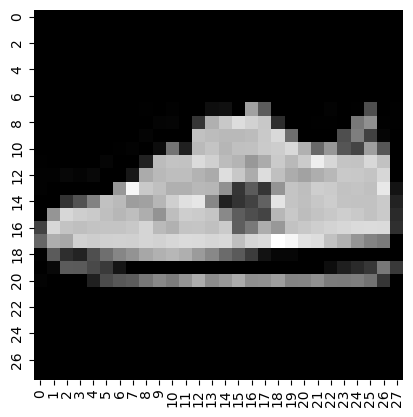

In [218]:
sns.heatmap(x_test[ind].reshape(28, 28), cmap='gray', cbar=False, square=True)